# 基于公司基本面的机器学习策略

## 1_data_download.ipynb 数据下载

基于 tushare 下载了沪深300成分股的数据，并存储在'./data'中。
下载数据包括daily、suspend、stk_limit、adj_factor、daily_basic、moneyflow、fina_indicator、income、balancesheet、cashflow

## 2_data_processing 数据处理

考虑到个人电脑的性能等问题，并参考了相关的代码，选取月频数据作为基准，因此需要将之前数据中的日频数据和季度数据均转为月频数据。构建了Converter_class.py来针对性的转变。Converter_class.py中构建了Converter类，其中包含了日频数据和季度数据转月频的函数，且针对季度数据，额外延长了两个月的有效时间。

## 3_factor_generate 因子生成

公司基本面中有许多重要的数据，参考 https://github.com/phonegapX/alphasickle 中使用的相关因子，构建了FactorGenerator_class.py，其中包含了针对同一股票不同数据集的因子提取，最终得到的因子有：        
EP（每股盈利倒数）

EPcut（扣除非经常性损益后的每股盈利倒数）

BP（每股净资产倒数）

SP（每股销售收入倒数）

DP（股息率）

G/PE（盈利增长率与市盈率的乘积）

netprofit_yoy 净利润增长率：公司利润增长水平

eps_yoy 每股收益增长率：每股收益的年度增长百分比

ROE（净资产收益率）：公司获得每一元股东权益的净利润能力

ROA（总资产回报率）：公司利用全部资产获取的净利润能力

总资产（total_assets）：公司所有的资产总额。

总负债（total_liabilities）：公司所有的负债总额。

净资产（equity）：公司净资产的价值，等于总资产减去总负债。

流动比率（current_ratio）：公司流动资产与流动负债之间的关系，用于评估公司偿还短期债务的能力。

毛利率（grossprofit_margin）：公司销售商品或提供服务所创造的毛利润占销售收入的比例，用于评估公司经营效益。

净利润率（netprofit_margin）：公司净利润占销售收入的比例，用于评估公司盈利水平。

负债比率（debt_ratio）：公司负债占总资产的比例，用于评估公司的财务风险程度。

负债权益比（debt_to_equity_ratio）：公司负债与净资产之间的比例，用于评估公司财务杠杆程度。

波动率：股票价格的波动程度

相对强弱指数（RSI）：用于度量股票内在强度的指标

MACD（移动平均线收敛/发散）：用于识别股票价格趋势的指标

shift_predict_value：当前收盘价相对于前一月收盘价的涨跌幅

close：收盘价

预测值predict_value：后一月的收盘价相对于当前收盘价的涨跌幅

## 4_model_train 因子生成

考虑到月频数据可以采用一步向后预测，且每一次都需要进行模型训练，即需要针对性的构建训练集和预测集，因此构建了 Data_Combain_class.py 来针对已经生成的因子数据进行组合，使其变为统一的训练集和预测集，同时对数据进行标准化。

本文所使用的机器学习模型包括xgboost和svr，最后将其加权组合作为最终的结果。



## 5_all_daily.ipynb

将所有股票的数据整合在一起形成dail_price.csv，便于之后的回测。

## 6_back_trader.ipynb

参考 https://github.com/QuantWorld2022/backtrader 的内容，基于backtrader进行回测，设置初始资金 100,000,000、佣金，双边各 0.0003、滑点：双边各 0.0001，并采用调仓表的方式实现回测。

最终的结果为：
--------------- AnnualReturn -----------------

OrderedDict([(2021, 0.19374336465105024), (2022, -0.1839738653204026), (2023, -0.04118828045486145)])

--------------- DrawDown -----------------

AutoOrderedDict([('len', 453), ('drawdown', 22.402715938535742), ('moneydown', 26965130.319241077), ('max', AutoOrderedDict([('len', 453), ('drawdown', 22.52915127970795), ('moneydown', 27117314.78924106)]))])

--------------- Returns -----------------

OrderedDict([('rtot', -0.06827539570559421), ('ravg', -0.00010552611391900187), ('rnorm', -0.026242111532058642), ('rnorm100', -2.6242111532058643)])

--------------- SharpeRatio -----------------

OrderedDict([('sharperatio', -0.16512585121611678)])

--------------- SharpeRatio_A -----------------

OrderedDict([('sharperatio', -0.1314689410879104)])

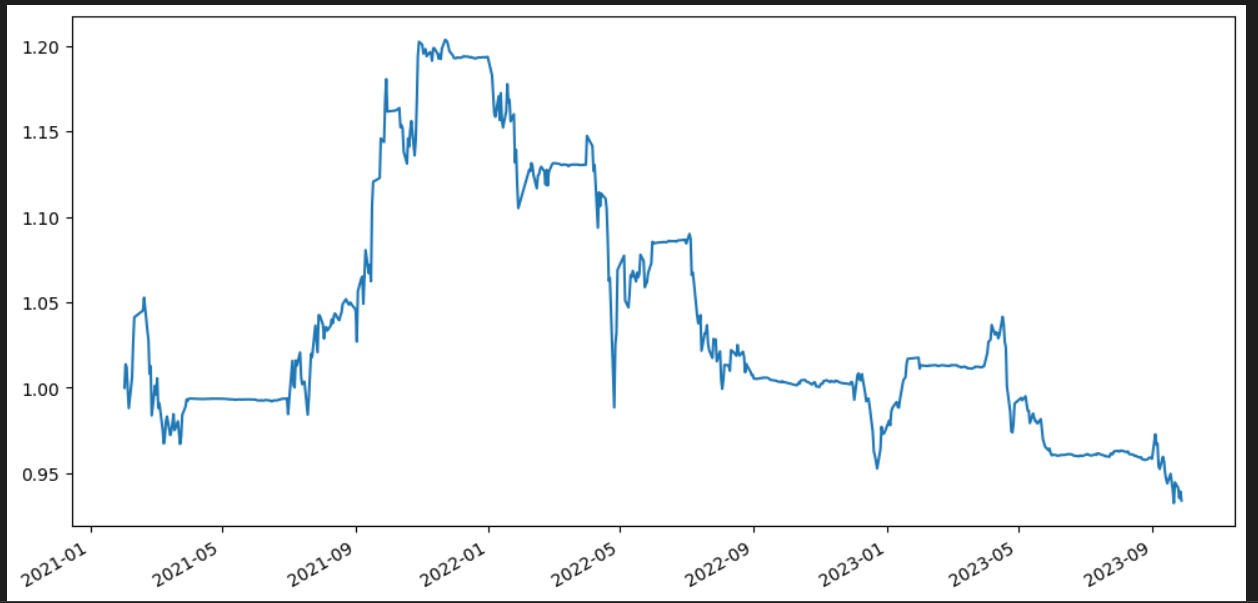
